<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score, roc_curve

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

## Обработка датасета.

В ходе выполнения работы было обнаружено отсутствие некоторых значений в поле "TotalSpent", которые интерпретировались Pandas как объекты(строки). Строки датасеты, содержащие пустые значения в поле TotalSpent были выброшены из выборки. 

Также была предпринята попытка выбросить значения категориальных признаков 'HasMultiplePhoneNumbers', 'HasOnlineSecurityService', 'HasDeviceProtection', 'HasTechSupportAccess' содержащие значения отсутствия сервисов. Однако, в ходе обучения модели стало понятно, что без учета этих признаков, классификаторы дают более плохую точность.

In [3]:
data = pd.read_csv('./train.csv')
data.head()
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors = 'coerce')
data.dropna(inplace = True)
# data = data[ data[ 'HasMultiplePhoneNumbers'].str.contains( 'No phone service' )==False ]
# data = data[ data[ 'HasOnlineSecurityService'].str.contains( 'No internet service' )==False ]
# data = data[ data[ 'HasDeviceProtection'].str.contains( 'No internet service' )==False ]
# data = data[ data[ 'HasTechSupportAccess'].str.contains( 'No internet service' )==False ]

In [4]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

## Построение гистограмм и круговых диаграмм 

Используя matplotlib библиотеку были построены круговые диаграммы наличия категориальных признаков и гистограммы численных признаков приведенного датасета.

По графикам видно, что, действительно, некоторые классы не являются сбалансированными. (например, "HasPhoneService")

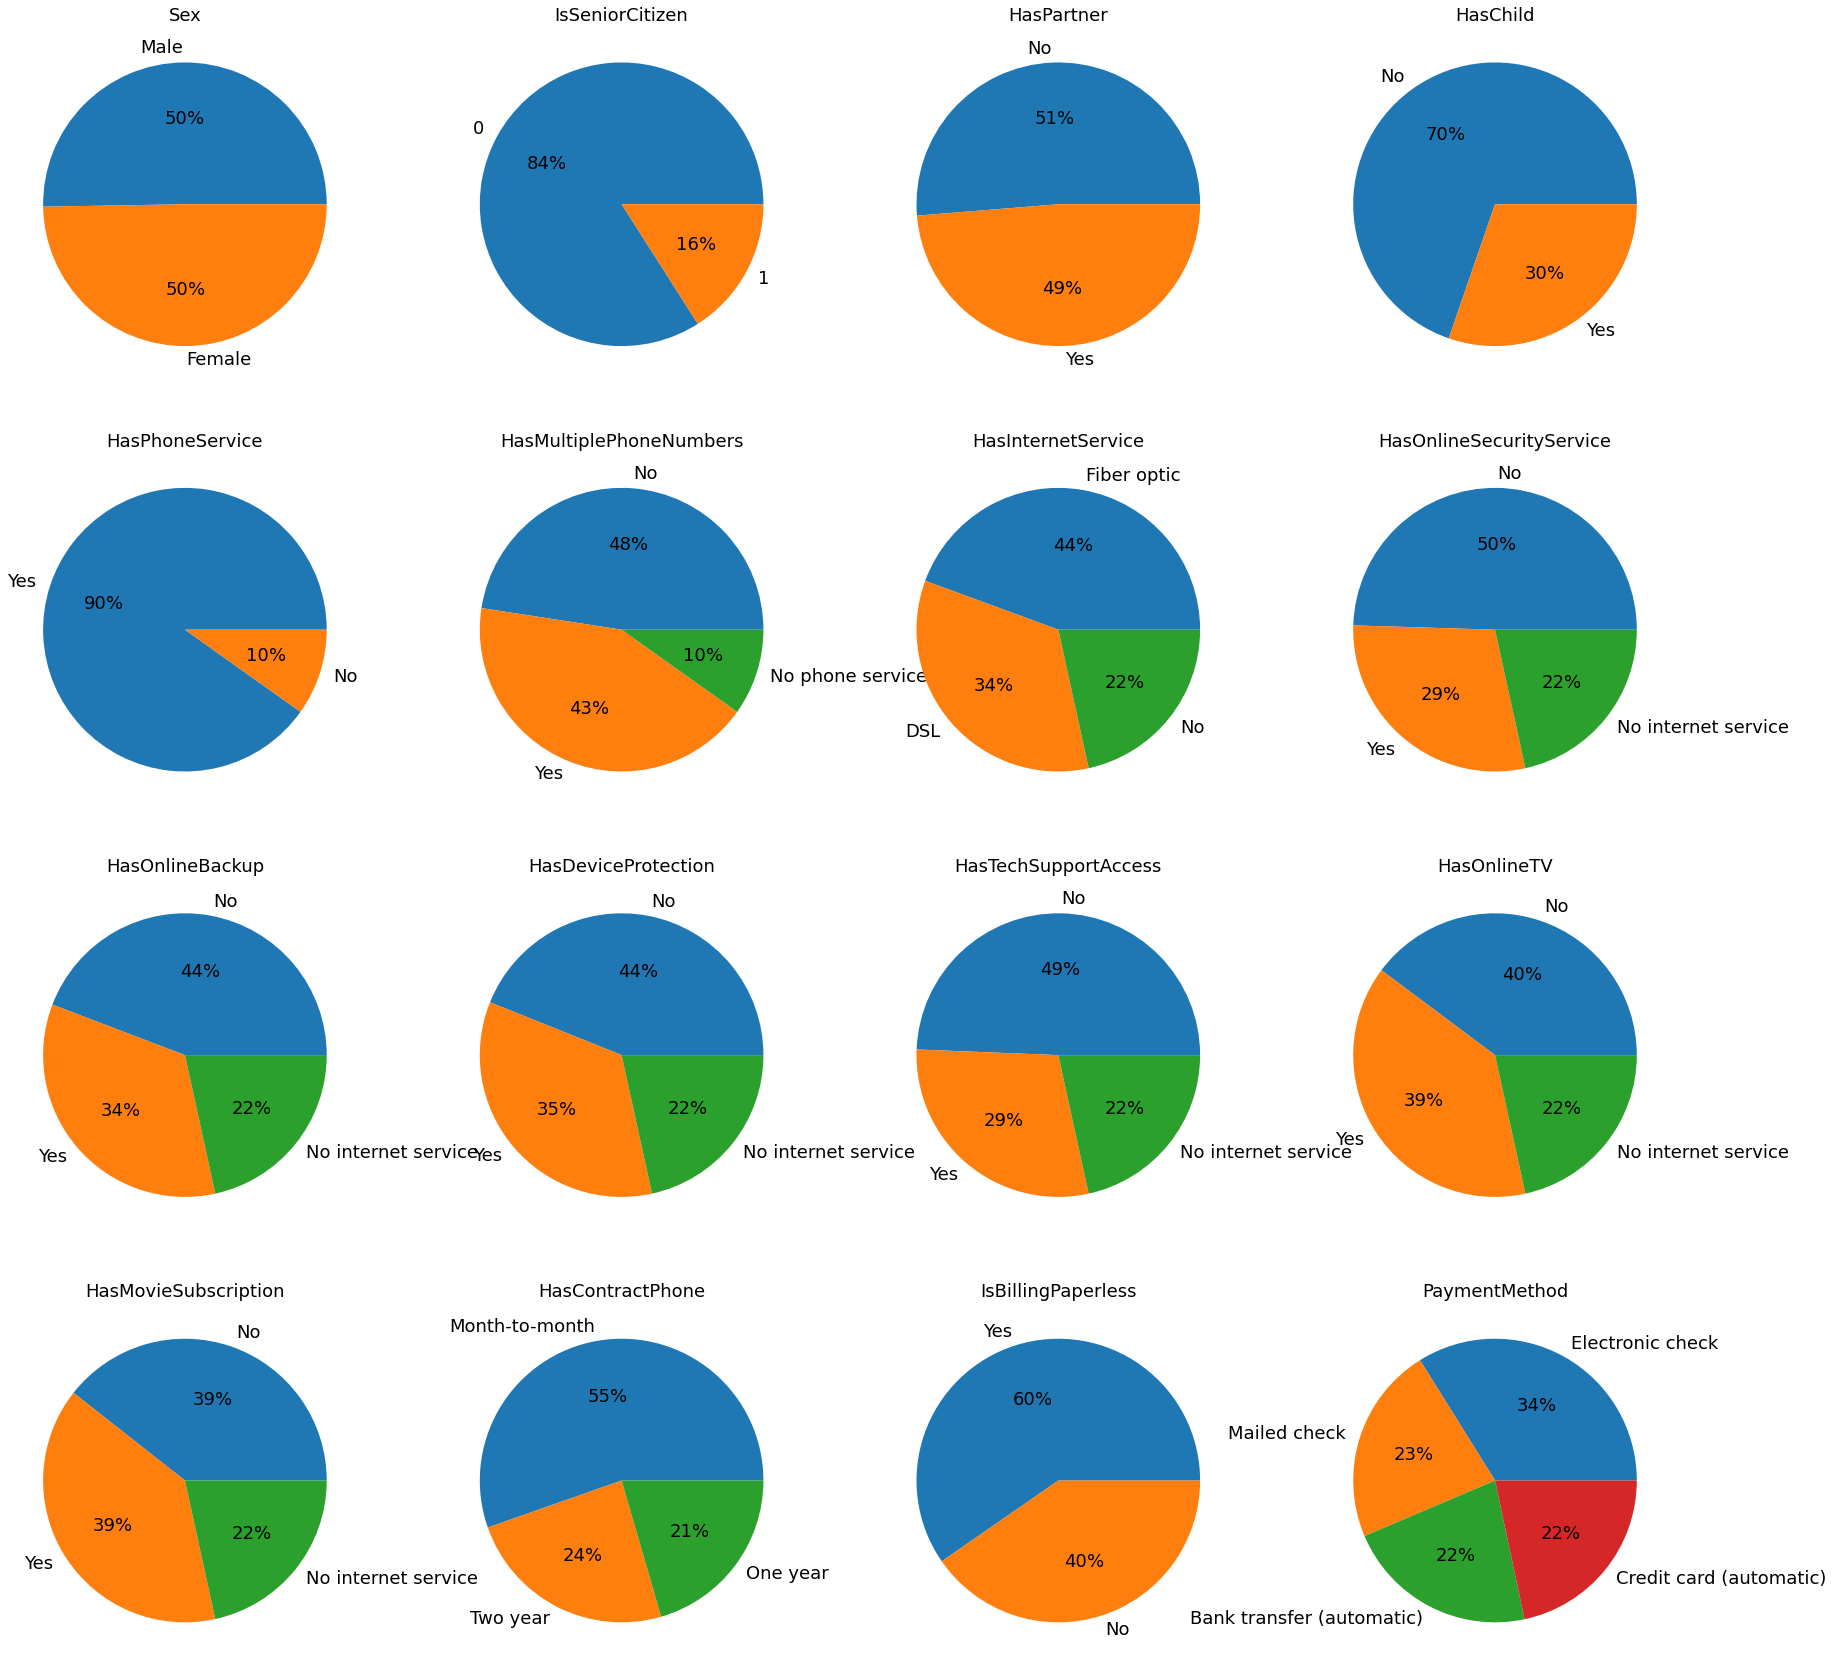

In [7]:
#категориальные признаки

for i in range(len(cat_cols)):
    plt.subplot(4,4,i+1)
    ax = data[cat_cols[i]].value_counts().plot(kind = "pie",figsize=(30,30), autopct='%1.0f%%',  textprops={'fontsize': 18})
    plt.title(cat_cols[i], fontsize = 18)
    ax.set(ylabel='', aspect='equal')
    

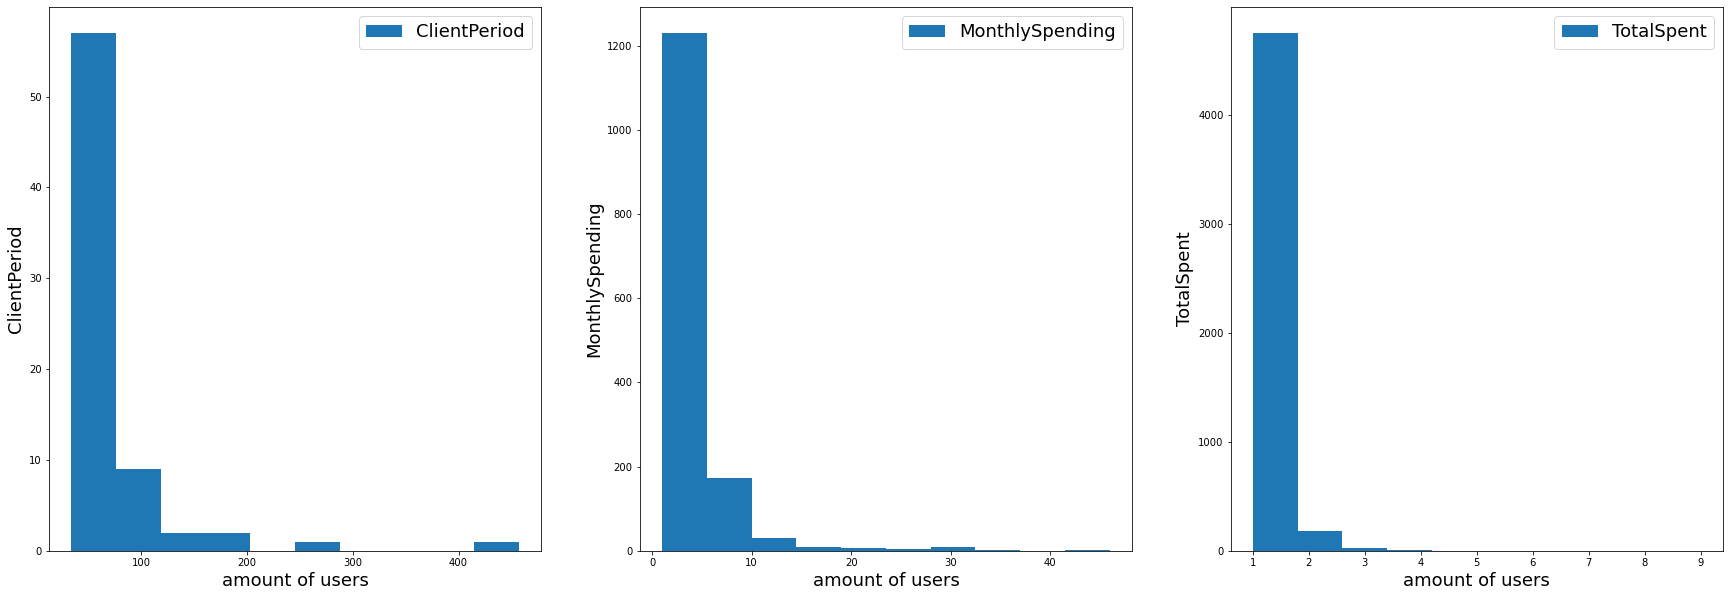

In [8]:
#численные признаки

for i in range(len(num_cols)):
    plt.subplot(1,3,i+1)
    
    ax = data[num_cols[i]].value_counts().plot(kind = "hist",figsize=(30,10), label = num_cols[i])
    ax.set_xlabel('amount of users',fontsize = 18)
    ax.set_ylabel(num_cols[i],fontsize = 18)
    plt.legend(fontsize = 18)
    
    

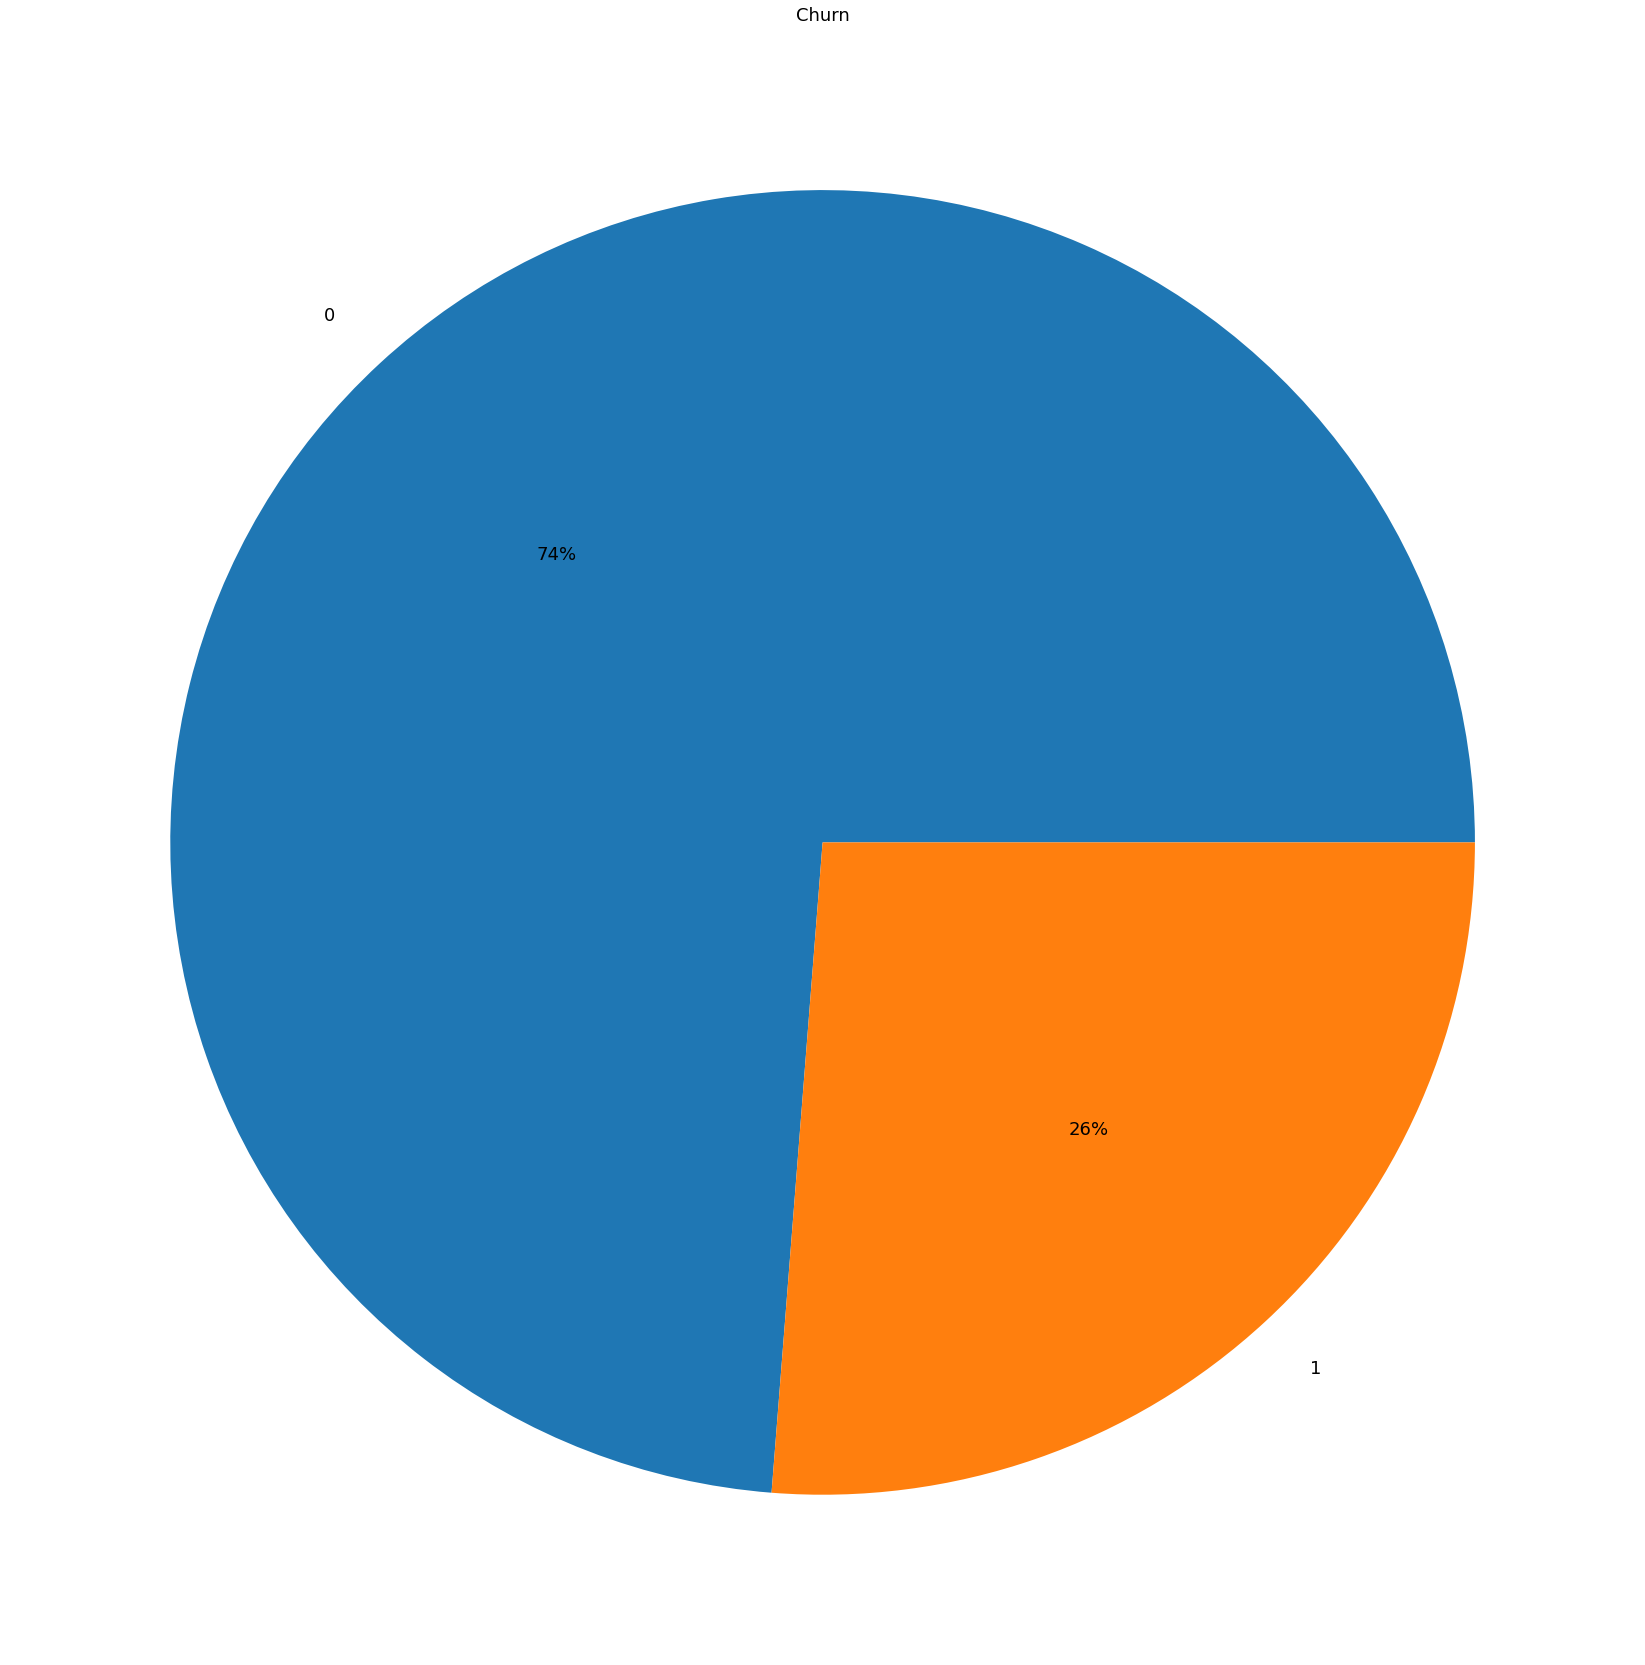

In [9]:
ax = data['Churn'].value_counts().plot(kind = "pie",figsize=(30,30), autopct='%1.0f%%',  textprops={'fontsize': 18})
plt.title('Churn', fontsize = 18)
ax.set(ylabel='', aspect='equal');
    

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

# Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [10]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

## Обучение модели

Для решения задачи классификации была выбрана модель LogisticRegression класса sklearn. Выборка была разделена на train/test часть, численные признаки отнормированы, категориальные закодированы с помощью one-hot-encoding. Помимо этого использовалась кроссвалидация и был выбран лучший гиперпараметр из:  0.001, 0.01, 0.05, 0.1, 1, 100

In [ ]:
y = data['Churn']

#one-hot
categorial_data = data[cat_cols]

numerical_data = data[num_cols]

dummy_features = pd.get_dummies(categorial_data,dtype="int64")
X = pd.concat([numerical_data, dummy_features], axis = 1)

#разбиение на test train выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)
scaler = StandardScaler()
#нормировка
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

CV_model = LogisticRegressionCV(scoring='roc_auc', refit=True, cv=5,n_jobs=-1, Cs= [0.001, 0.01, 0.05, 0.1, 1., 100.])
CV_model.fit(X_train_scaled, y_train)
y_train_predicted =CV_model.predict_proba(X_train_scaled)[:, 1]
y_test_predicted =CV_model.predict_proba(X_test_scaled)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
print(train_auc)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(test_auc)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## train_auc = 0.8497466349090305, test_auc = 0.8433781552252889

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [11]:
import catboost
data = pd.read_csv('./train.csv')

data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors = 'coerce')
data.dropna(inplace = True)
#data = data[ data[ 'HasMultiplePhoneNumbers'].str.contains( 'No phone service' )==False ]
#data = data[ data[ 'HasOnlineSecurityService'].str.contains( 'No internet service' )==False ]
#data = data[ data[ 'HasDeviceProtection'].str.contains( 'No internet service' )==False ]
#data = data[ data[ 'HasTechSupportAccess'].str.contains( 'No internet service' )==False ]
print(data.info())
y = data['Churn']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

## Градиентный бустинг

Данная выборка была исследована методом градиентного бустинга с помощью библиотеки CatBoost. Обучая CatBoostClassifier на train выборке, перебором был определена пара параметров(количества деревьев и learning rate), дающая наибольший test_auc. Количество деревьев подбиралось из range(50, 500, 50), learning_rate от 0 до 1 с шагом 0.01

In [12]:
best_auc = 0
best_n = 0
best_lr = 0
#print(data.head())
data1 = data.iloc[:,:-1]

#print(data1.info())
X_train, X_test, y_train, y_test = train_test_split(data1, y, train_size=0.8,random_state=42)
# a = []
# b = []
# for i in range(50, 500,50):
#     for j in range(0, 100, 1):
#         boosting_model = catboost.CatBoostClassifier(n_estimators=i, cat_features=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], eval_metric='AUC', learning_rate = 1 - 1/100*j)
#         boosting_model.fit(X_train,y_train)
#         y_train_predicted =boosting_model.predict_proba(X_train)[:, 1]
#         y_test_predicted =boosting_model.predict_proba(X_test)[:, 1]
#         train_auc = roc_auc_score(y_train, y_train_predicted)
        
#         test_auc = roc_auc_score(y_test, y_test_predicted)
#         if(test_auc>best_auc):
#             best_auc = test_auc
#             best_n = i
#             best_lr = 1 - 1/100*j
# print(best_auc)
# print(best_n)
#  print(best_lr)

## Лучшими параметрами оказались n = 100, learning_rate = 0.24

In [14]:
boosting_model = catboost.CatBoostClassifier(n_estimators=100, cat_features=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], eval_metric='AUC', learning_rate = 0.24)

boosting_model.fit(X_train,y_train)
y_train_predicted =boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted =boosting_model.predict_proba(X_test)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(train_auc)
print(test_auc)

0:	total: 36.7ms	remaining: 3.63s
1:	total: 78.4ms	remaining: 3.84s
2:	total: 119ms	remaining: 3.84s
3:	total: 156ms	remaining: 3.74s
4:	total: 197ms	remaining: 3.75s
5:	total: 238ms	remaining: 3.73s
6:	total: 263ms	remaining: 3.5s
7:	total: 307ms	remaining: 3.53s
8:	total: 348ms	remaining: 3.51s
9:	total: 389ms	remaining: 3.5s
10:	total: 417ms	remaining: 3.38s
11:	total: 468ms	remaining: 3.43s
12:	total: 517ms	remaining: 3.46s
13:	total: 562ms	remaining: 3.45s
14:	total: 609ms	remaining: 3.45s
15:	total: 660ms	remaining: 3.46s
16:	total: 723ms	remaining: 3.53s
17:	total: 776ms	remaining: 3.53s
18:	total: 821ms	remaining: 3.5s
19:	total: 866ms	remaining: 3.46s
20:	total: 894ms	remaining: 3.36s
21:	total: 945ms	remaining: 3.35s
22:	total: 993ms	remaining: 3.32s
23:	total: 1.04s	remaining: 3.29s
24:	total: 1.09s	remaining: 3.26s
25:	total: 1.11s	remaining: 3.15s
26:	total: 1.17s	remaining: 3.17s
27:	total: 1.21s	remaining: 3.11s
28:	total: 1.24s	remaining: 3.03s
29:	total: 1.29s	remainin

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## train_auc = 0.874768208971108, test_auc = 0.8459731068648266

# Предсказания

In [15]:
best_model = boosting_model

In [17]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,-1] 
submission.to_csv('./my_submission.csv', index=False)
submission_final = pd.read_csv('./my_submission.csv')
submission_final


,Id,Churn
0,0,0.039793
1,1,0.820206
2,2,0.656708
3,3,0.013040
4,4,0.005163
...,...,...
1756,1756,0.135222
1757,1757,0.012652
1758,1758,0.901147
1759,1759,0.587660


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.